In [88]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

C:\Users\Arka Pravo Dutta\AppData\Local\Temp\ipykernel_6452\1716283469.py:4: DtypeWarning: Columns (1,2,4,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("survey_results_public.csv")


In [89]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1.0,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2.0,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3.0,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4.0,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5.0,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [90]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [91]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9139 entries, 7 to 14290
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       9139 non-null   object 
 1   EdLevel       8990 non-null   object 
 2   YearsCodePro  9100 non-null   object 
 3   Employment    9132 non-null   object 
 4   Salary        9139 non-null   float64
dtypes: float64(1), object(4)
memory usage: 428.4+ KB


In [93]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [94]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7928 entries, 7 to 14290
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       7928 non-null   object 
 1   EdLevel       7928 non-null   object 
 2   YearsCodePro  7928 non-null   object 
 3   Salary        7928 non-null   float64
dtypes: float64(1), object(3)
memory usage: 309.7+ KB


In [95]:
df['Country'].value_counts()

United States     2181
India              769
United Kingdom     562
Germany            459
Canada             350
                  ... 
Haiti                1
Cuba                 1
Honduras             1
Sudan                1
Benin                1
Name: Country, Length: 130, dtype: int64

In [96]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [99]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other             3957
United States     2181
India              769
United Kingdom     562
Germany            459
Name: Country, dtype: int64

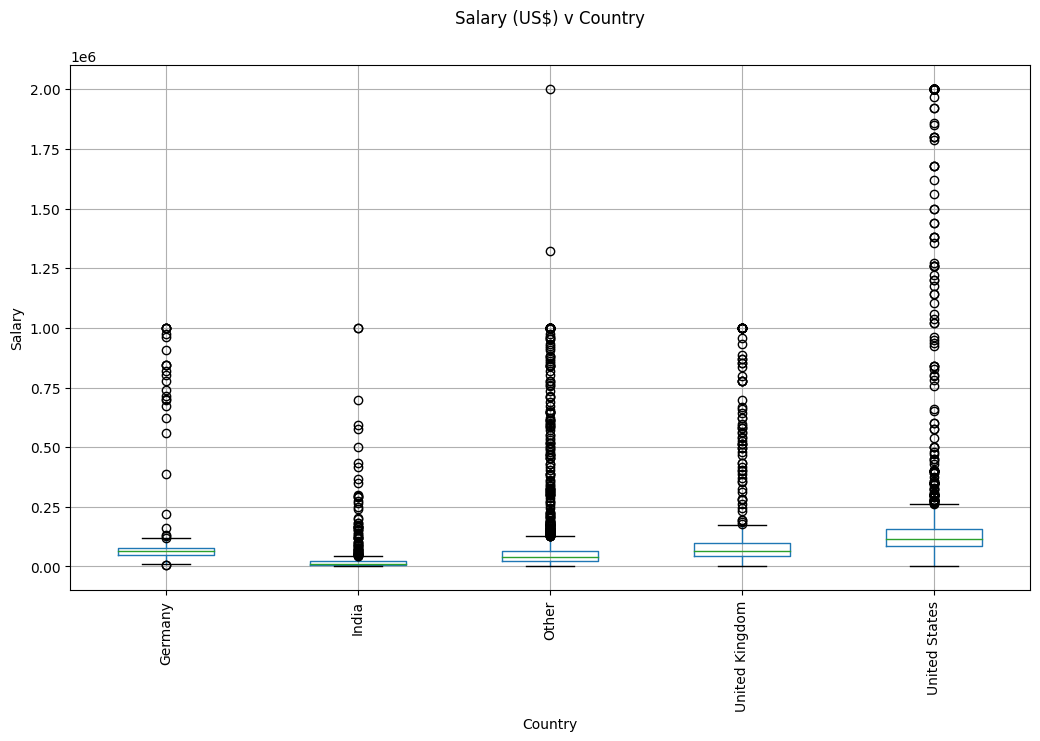

In [100]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

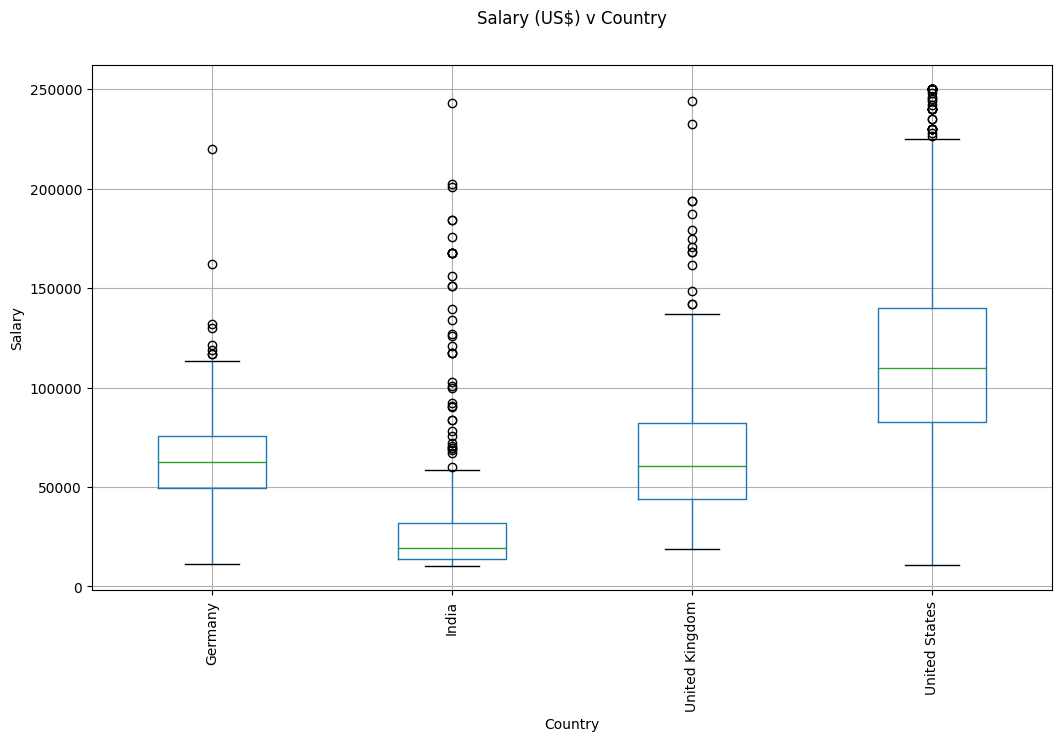

In [101]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [102]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '1', '3', '20', '10', '29', '28', '8', '6', '23',
       '15', '7', '25', '11', 'Less than 1 year', '5', '21', '16', '12',
       '18', '14', '32', '9', '19', '22', '38', '30', '17', '24', '34',
       '26', '35', '33', '27', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43'], dtype=object)

In [103]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [104]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [105]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [106]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [107]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([0, 2, 1, 3])

In [108]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([3, 2, 0, 1])

In [109]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [110]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [111]:
y_pred = linear_reg.predict(X)

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [113]:
error

39372.01465902804

In [114]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [115]:
y_pred = dec_tree_reg.predict(X)

In [116]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,202.90


In [117]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [118]:
y_pred = random_forest_reg.predict(X)

In [119]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,391.76


In [120]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [121]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$35,612.86


In [122]:
X

,Country,EdLevel,YearsCodePro
7,3,0,13.0
9,2,2,4.0
10,2,0,2.0
13,3,1,1.0
16,3,0,3.0
...,...,...,...
14264,0,2,6.0
14275,2,2,6.0
14281,2,0,26.0
14287,2,0,27.0


In [123]:
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [124]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[ 3.,  2., 15.]])

In [125]:
y_pred = regressor.predict(X)
y_pred

C:\Users\Arka Pravo Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([142005.55159475])

In [126]:
import pickle

In [127]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [128]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [129]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\Arka Pravo Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([142005.55159475])